In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("weather_bulk_for_Riyadh.csv")

In [3]:
columns_to_drop = ['dt', 'timezone', 'city_name', 'lat', 'lon', 'weather_icon']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [4]:
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


In [5]:
df['dt_iso'] = pd.to_datetime(df['dt_iso'], format='%Y-%m-%d %H:%M:%S +0000 UTC', errors='coerce')
df['month'] = df['dt_iso'].dt.month


df['season'] = df['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else
              'Spring' if x in [3, 4, 5] else
              'Summer' if x in [6, 7, 8] else
              'Autumn'
)

In [6]:
X = df[['pressure', 'wind_speed', 'humidity', 'clouds_all', 'month']]
y = df['temp']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train R²: 0.8264455367141099
Test R²: 0.8253662831679014
Train RMSE: 4.007468463766314
Test RMSE: 4.017525378044814


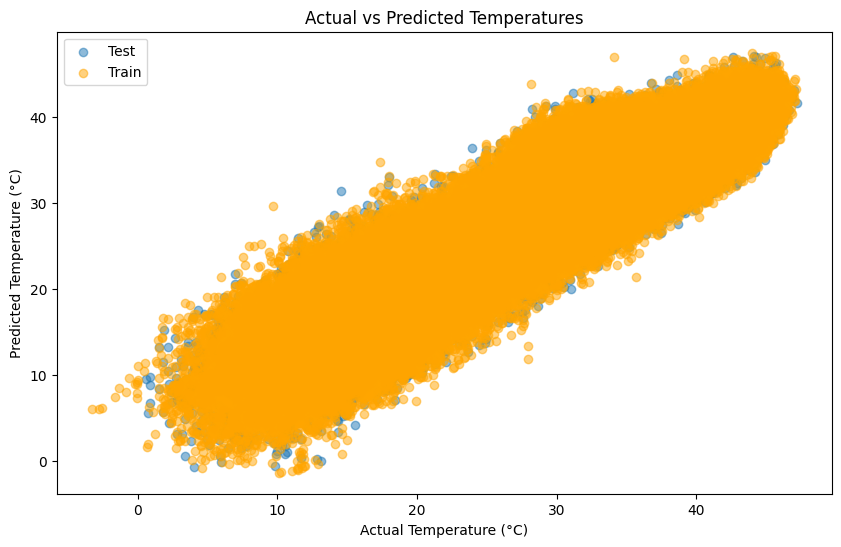

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test')
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train', color='orange')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.show()

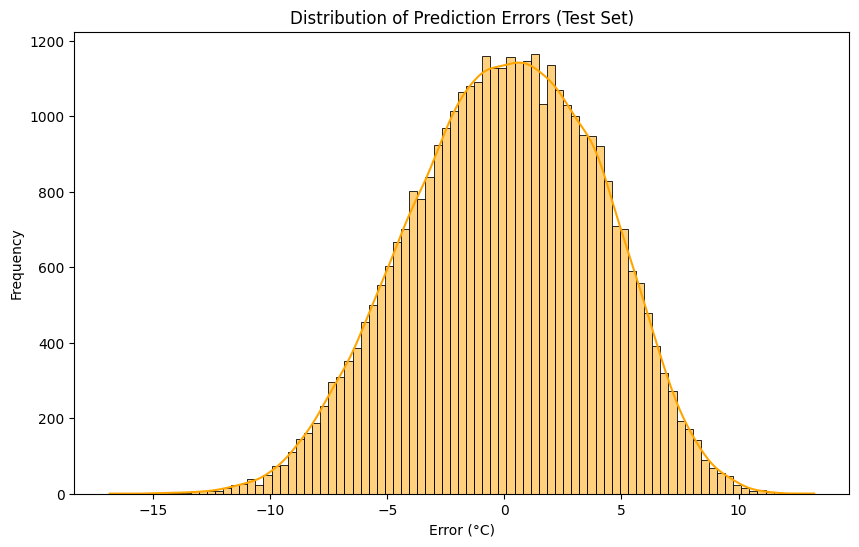

In [13]:
errors = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='orange')
plt.title("Distribution of Prediction Errors (Test Set)")
plt.xlabel("Error (°C)")
plt.ylabel("Frequency")
plt.show()